# Generative Adversarial Network for ECG synthesis


![](https://64.media.tumblr.com/66dc00e688f72af4d7b5d768005359c4/094fefb7e60b17ee-9c/s500x750/3060385c5fdcb38f3a716d8a309a40e69e598a5f.png)

## Introducci√≥n

Este notebook implementa una Red Generativa Adversaria (GAN) unidimensional para la s√≠ntesis de se√±ales de electrocardiograma (ECG). El objetivo es generar se√±ales ECG sint√©ticas que mantengan las caracter√≠sticas principales de las se√±ales reales correspondientes a diferentes patolog√≠as card√≠acas.

### Objetivos
- Entrenar un modelo GAN para generar se√±ales ECG sint√©ticas
- Evaluar la calidad de las se√±ales generadas compar√°ndolas con se√±ales reales
- Contribuir al aumento de datos para mejorar el diagn√≥stico autom√°tico de patolog√≠as card√≠acas

## Instalaci√≥n de dependencias

Instalamos PyTorch, la librer√≠a principal para el desarrollo de modelos de deep learning que utilizaremos para implementar nuestra GAN.

In [2]:
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 536.2/536.2 kB 8.2 MB/s  0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 184.4/184.4 MB 38.7 MB/s  0:00:04m0:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 25.2 MB/s  0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 32.3 MB/s  0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.3/6.3 MB 36.8 MB/s  0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9/9 [torchvision] [torchvis

## Importaci√≥n de librer√≠as

Importamos todas las librer√≠as necesarias para el procesamiento de datos, visualizaci√≥n y desarrollo del modelo GAN.

In [11]:
import os
import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW, Adam


## Configuraci√≥n del entorno

Definimos la configuraci√≥n global del proyecto y establecemos la semilla para asegurar la reproducibilidad de los resultados.

In [12]:
class Config:
    csv_path = ''
    seed = 2021
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

def seed_everything(seed: int):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
    
config = Config()
seed_everything(config.seed)

## Carga y preparaci√≥n de datos

### Dataset MIT-BIH y PTB-DB
Cargamos los datasets de ECG que contienen diferentes tipos de arritmias y patolog√≠as card√≠acas:
- **MIT-BIH Arrhythmia Database**: Contiene registros de ECG con diferentes tipos de arritmias
- **PTB Diagnostic ECG Database**: Contiene registros de ECG de pacientes con patolog√≠as card√≠acas

In [13]:
df_ptbdb = pd.read_csv('./ECG_DATASET_V2/ptbdb_abnormal.csv')
df_mitbih = pd.read_csv('./ECG_DATASET_V2/mitbih_train.csv')
df_ptbdb.head()

9.322328567504882812e-01  8.696785569190979004e-01  \
0                  1.000000                  0.606941   
1                  1.000000                  0.951613   
2                  0.977819                  0.899261   
3                  0.935618                  0.801661   
4                  0.925265                  0.433352   

   8.861859440803527832e-01  9.296264052391052246e-01  \
0                  0.384181                  0.254237   
1                  0.923963                  0.853303   
2                  0.230129                  0.032348   
3                  0.805815                  1.000000   
4                  0.073620                  0.079197   

   9.087749719619750977e-01  9.339704513549804688e-01  \
0                  0.223567                  0.276836   
1                  0.791859                  0.734255   
2                  0.142329                  0.223660   
3                  0.722741                  0.480789   
4                  0.136643                  0.182934   

   8.010425567626953125e-01  7.497828006744384766e-01  \
0                  0.253430                  0.184826   
1                  0.672043                  0.685100   
2                  0.328096                  0.367837   
3                  0.454829                  0.319834   
4                  0.182934                  0.182376   

   6.872285008430480957e-01  6.350998878479003906e-01  ...  \
0                  0.153349                  0.121872  ...   
1                  0.670507                  0.667435  ...   
2                  0.381701                  0.389094  ...   
3                  0.266874                  0.308411  ...   
4                  0.196877                  0.203569  ...   

   0.000000000000000000e+00.117  0.000000000000000000e+00.118  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   0.000000000000000000e+00.119  0.000000000000000000e+00.120  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   0.000000000000000000e+00.121  0.000000000000000000e+00.122  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   0.000000000000000000e+00.123  0.000000000000000000e+00.124  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   0.000000000000000000e+00.125  1.000000000000000000e+00.1  
0                           0.0                         1.0  
1                           0.0                         1.0  
2                           0.0                         1.0  
3                           0.0                         1.0  
4                           0.0                         1.0  

[5 rows x 188 columns]

In [14]:
df_mitbih_train = pd.read_csv('./ECG_DATASET_V2/mitbih_train.csv', header=None)
df_mitbih_test = pd.read_csv('./ECG_DATASET_V2/mitbih_test.csv', header=None)
df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)
df_mitbih.rename(columns={187: 'class'}, inplace=True)

id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}
df_mitbih['label'] = df_mitbih.iloc[:, -1].map(id_to_label)
print(df_mitbih.info())

<class 'pandas.core.frame.DataFrame'>
Index: 109446 entries, 0 to 21891
Columns: 189 entries, 0 to label
dtypes: float64(188), object(1)
memory usage: 158.7+ MB
None


### Procesamiento del dataset MIT-BIH
Combinamos los datos de entrenamiento y prueba del dataset MIT-BIH, y creamos etiquetas descriptivas para cada clase de arritmia.

In [15]:
#df_mitbih.to_csv('data.csv', index=False)
config.csv_path = 'data.csv'

# An√°lisis Exploratorio de Datos (EDA)

En esta secci√≥n realizamos un an√°lisis exploratorio para comprender la distribuci√≥n de las clases en nuestro dataset y visualizar las caracter√≠sticas de las se√±ales ECG.

In [16]:
!pwd

/home/hinton2/Documents/proyecto_moises/Tesis-MIA-UNI/notebooks


In [17]:
df = pd.read_csv("./data.csv")
df.head()

0         1         2         3         4         5         6  \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

          7         8         9  ...  179  180  181  182  183  184  185  186  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   class   label  
0    0.0  Normal  
1    0.0  Normal  
2    0.0  Normal  
3    0.0  Normal  
4    0.0  Normal  

[5 rows x 189 columns]

### Visualizaci√≥n de los datos
Cargamos el dataset procesado y examinamos su estructura y contenido.

In [18]:
df['label'].value_counts()

label
Normal                               90589
Fusion of paced and normal            8039
Premature ventricular contraction     7236
Artial Premature                      2779
Fusion of ventricular and normal       803
Name: count, dtype: int64

### Distribuci√≥n de clases
Analizamos la distribuci√≥n de las diferentes clases de arritmias en nuestro dataset para identificar posibles desbalances.

/tmp/ipykernel_333518/3480477453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_333518/3480477453.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15);


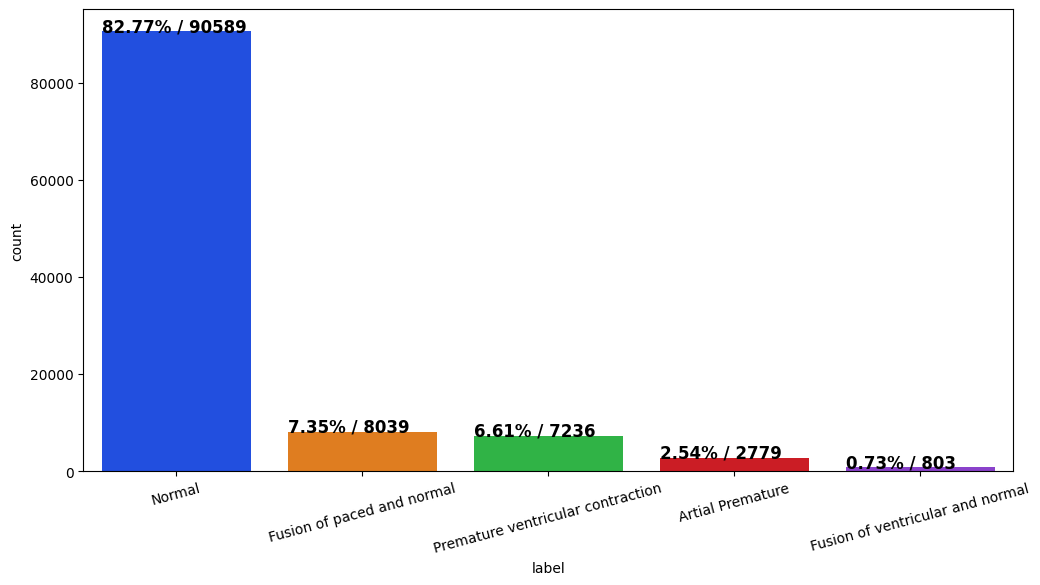

In [19]:
percentages = [count / df.shape[0] * 100 for count in df['label'].value_counts()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    x=df['label'],
    ax=ax,
    palette="bright",
    order=df['label'].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

for percentage, count, p in zip(
    percentages,
    df['label'].value_counts(sort=True).values,
    ax.patches):
    
    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')
    
plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('data_dist.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

### Gr√°fico de distribuci√≥n de clases
Creamos una visualizaci√≥n detallada que muestra tanto el conteo como el porcentaje de cada clase en el dataset.

# Preparaci√≥n del Dataset para PyTorch

En esta secci√≥n implementamos las clases necesarias para manejar los datos de ECG con PyTorch, incluyendo un Dataset personalizado y DataLoader para el entrenamiento del modelo.

In [20]:
class ECGDataset(Dataset):

    def __init__(self, df):
        self.df = df
        self.data_columns = self.df.columns[:-2].tolist()

    def __getitem__(self, idx):
        signal = self.df.loc[idx, self.data_columns].astype('float32')
        signal = torch.FloatTensor([signal.values])                 
        target = torch.LongTensor(np.array(self.df.loc[idx, 'class']))
        return signal, target

    def __len__(self):
        return len(self.df)

def get_dataloader(label_name, batch_size):
    df = pd.read_csv(config.csv_path)
    df = df.loc[df['label'] == label_name]
    df.reset_index(drop=True, inplace=True)
    dataset = ECGDataset(df)
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size, num_workers=0)
    return dataloader
    
    
dataloader = get_dataloader(label_name='Artial Premature', batch_size=96)

print(len(dataloader))
x,y = next(iter(dataloader))
x.shape, y.shape

29


/tmp/ipykernel_333518/3944258185.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  signal = torch.FloatTensor([signal.values])


(torch.Size([96, 1, 187]), torch.Size([96]))

### Clase ECGDataset
Implementamos una clase personalizada de Dataset que hereda de `torch.utils.data.Dataset` para manejar espec√≠ficamente datos de ECG.

### Funci√≥n get_dataloader
Funci√≥n auxiliar que crea un DataLoader filtrado por tipo de arritmia, permitiendo entrenar el modelo con una clase espec√≠fica.

# Arquitectura de la GAN

En esta secci√≥n definimos las arquitecturas del Generador y Discriminador que componen nuestra Red Generativa Adversaria (GAN) para s√≠ntesis de se√±ales ECG unidimensionales.

In [21]:
import torch.nn as nn
import torch.nn.functional as F


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 187)
        self.rnn_layer = nn.LSTM(
                input_size=187,
                hidden_size=128,
                num_layers=1,
                bidirectional=True,
                batch_first=True,
            )
    def forward(self, x):
        x,_ = self.rnn_layer(x)
        x = x.view(-1,256)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.dropout(x, p=0.2)
        x = self.fc3(x)
        return x.unsqueeze(1)


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.rnn_layer = nn.LSTM(
                input_size=187,
                hidden_size=256,
                num_layers=1,
                bidirectional=True,
                batch_first=True,
            )
        self.fc1 = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, 256) 
        self.fc3 = nn.Linear(256, 1)

    def forward(self, x):
        x,_ = self.rnn_layer(x)
        x = x.view(-1, 512)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.dropout(x, p=0.2)
        x = torch.sigmoid(self.fc3(x))
        return x

## Generador
El **Generador** es responsable de crear se√±ales ECG sint√©ticas a partir de ruido aleatorio. Su arquitectura incluye:
- Una capa LSTM bidireccional para capturar dependencias temporales
- Capas completamente conectadas con activaci√≥n LeakyReLU
- Dropout para regularizaci√≥n

## Discriminador  
El **Discriminador** act√∫a como un clasificador binario que distingue entre se√±ales reales y sint√©ticas. Su arquitectura incluye:
- Una capa LSTM bidireccional para an√°lisis de secuencias temporales
- Capas completamente conectadas con activaci√≥n LeakyReLU
- Funci√≥n sigmoide en la salida para probabilidad binaria

# Entrenamiento de la GAN

Esta secci√≥n implementa el proceso de entrenamiento de la GAN utilizando el algoritmo est√°ndar donde el Generador y Discriminador compiten en un juego de suma cero.

In [22]:
class Trainer:
    def __init__(
        self,
        generator,
        discriminator,
        batch_size,
        num_epochs,
        label
    ):
        self.device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
        self.netG = generator.to(self.device)
        self.netD = discriminator.to(self.device)
        
        self.optimizerD = Adam(self.netD.parameters(), lr=0.0002)
        self.optimizerG = Adam(self.netG.parameters(), lr=0.0002)
        self.criterion = nn.BCELoss()
        
        self.batch_size = batch_size
        self.signal_dim = [self.batch_size, 1, 187]
        self.num_epochs = num_epochs
        self.dataloader = get_dataloader(
            label_name=label, batch_size=self.batch_size
        )
        self.fixed_noise = torch.randn(self.batch_size, 1, 187,
                                       device=self.device)
        self.g_errors = []
        self.d_errors = []
        
    def _one_epoch(self):
        real_label = 1
        fake_label = 0
        
        for i, data in enumerate(self.dataloader, 0):
            ##### Update Discriminator: maximize log(D(x)) + log(1 - D(G(z))) #####
            ## train with real data
            self.netD.zero_grad()
            real_data = data[0].to(self.device)
            # dim for noise
            batch_size = real_data.size(0)
            self.signal_dim[0] = batch_size
            
            label = torch.full((batch_size,), real_label,
                           dtype=real_data.dtype, device=self.device)
            
            output = self.netD(real_data)
            output = output.view(-1)
       
            errD_real = self.criterion(output, label)
            errD_real.backward()
            D_x = output.mean().item()
            
            ## train with fake data
            noise = torch.randn(self.signal_dim, device=self.device)
            fake = self.netG(noise)
            label.fill_(fake_label)
            
            output = self.netD(fake.detach())
            output = output.view(-1)
            
            errD_fake = self.criterion(output, label)
            errD_fake.backward()
            D_G_z1 = output.mean().item()
            errD = errD_real + errD_fake 
            self.optimizerD.step()
            
            ##### Update Generator: maximaze log(D(G(z)))  
            self.netG.zero_grad()
            label.fill_(real_label) 
            output = self.netD(fake)
            output = output.view(-1)
            
            errG = self.criterion(output, label)
            errG.backward()
            D_G_z2 = output.mean().item()
            self.optimizerG.step()
            
        return errD.item(), errG.item()
        
    def run(self):
        for epoch in range(self.num_epochs):
            errD_, errG_ = self._one_epoch()
            self.d_errors.append(errD_)
            self.g_errors.append(errG_)
            if epoch % 300 == 0:
                print(f"Epoch: {epoch} | Loss_D: {errD_} | Loss_G: {errG_} | Time: {time.strftime('%H:%M:%S')}")
   
                fake = self.netG(self.fixed_noise)
                plt.plot(fake.detach().cpu().squeeze(1).numpy()[:].transpose())
                plt.show()
            
        torch.save(self.netG.state_dict(), f"generator.pth")
        torch.save(self.netG.state_dict(), f"discriminator.pth")

## Clase Trainer
La clase `Trainer` encapsula todo el proceso de entrenamiento de la GAN:

### Componentes principales:
- **Optimizadores**: Adam para ambos modelos con learning rate de 0.0002
- **Funci√≥n de p√©rdida**: Binary Cross Entropy (BCE) Loss
- **Estrategia de entrenamiento**: Alternancia entre entrenamiento del Discriminador y Generador

### Proceso de entrenamiento por √©poca:
1. **Entrenamiento del Discriminador**: 
   - Maximizar log(D(x)) + log(1 - D(G(z)))
   - Entrenar con datos reales (etiqueta = 1)
   - Entrenar con datos falsos (etiqueta = 0)

2. **Entrenamiento del Generador**:
   - Maximizar log(D(G(z)))
   - Generar datos falsos y entrenar para que el discriminador los clasifique como reales

In [23]:
g = Generator()
d = Discriminator()

## Inicializaci√≥n de modelos
Creamos las instancias del Generador y Discriminador que ser√°n utilizados en el entrenamiento.

Epoch: 0 | Loss_D: 1.3516886234283447 | Loss_G: 0.7140058279037476 | Time: 16:41:21


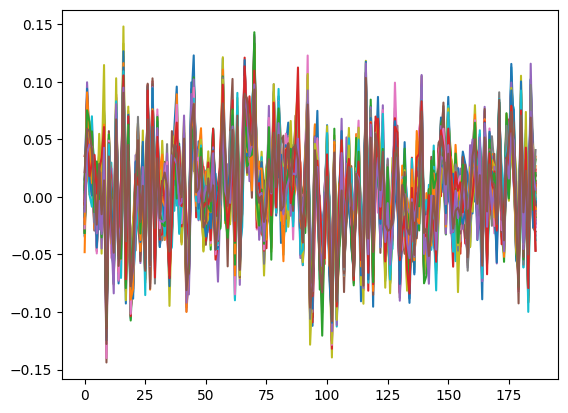

Epoch: 300 | Loss_D: 0.5363035202026367 | Loss_G: 1.588647484779358 | Time: 16:42:22


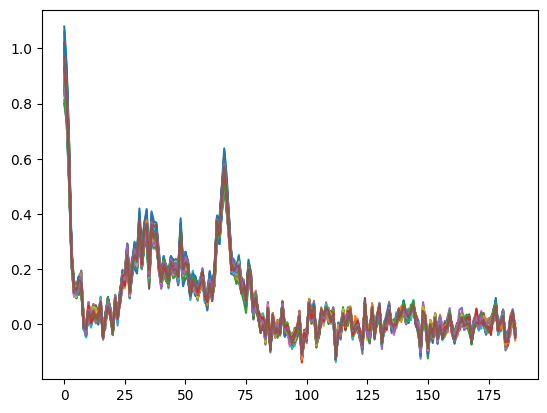

Epoch: 600 | Loss_D: 1.625252366065979 | Loss_G: 1.2979345321655273 | Time: 16:43:22


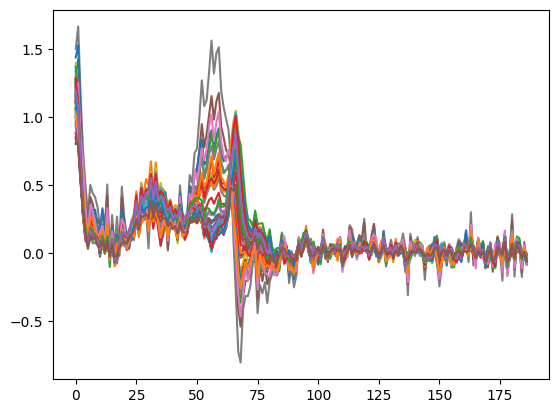

Epoch: 900 | Loss_D: 0.50527423620224 | Loss_G: 1.9761189222335815 | Time: 16:44:22


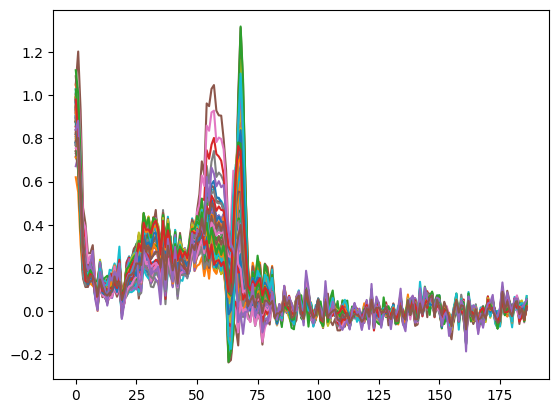

Epoch: 1200 | Loss_D: 0.6183063983917236 | Loss_G: 1.0089741945266724 | Time: 16:45:23


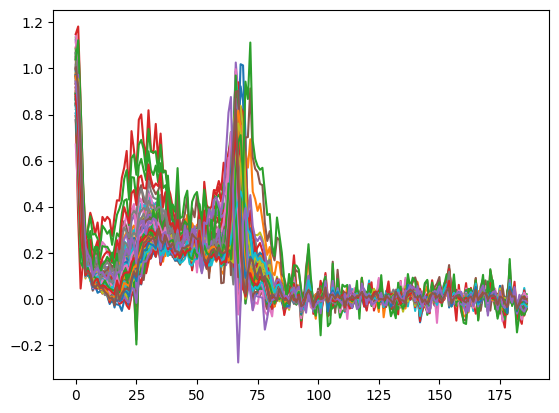

Epoch: 1500 | Loss_D: 0.5220233798027039 | Loss_G: 1.8662340641021729 | Time: 16:46:25


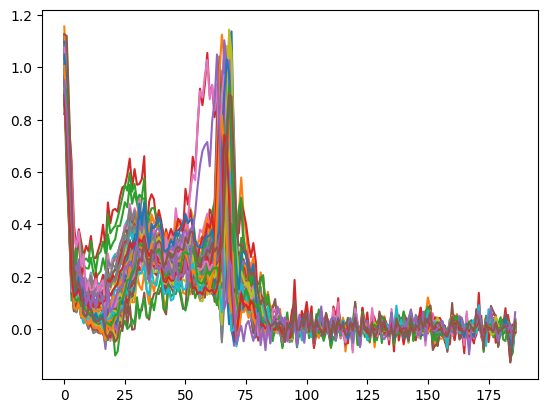

Epoch: 1800 | Loss_D: 0.52793288230896 | Loss_G: 1.9692426919937134 | Time: 16:47:27


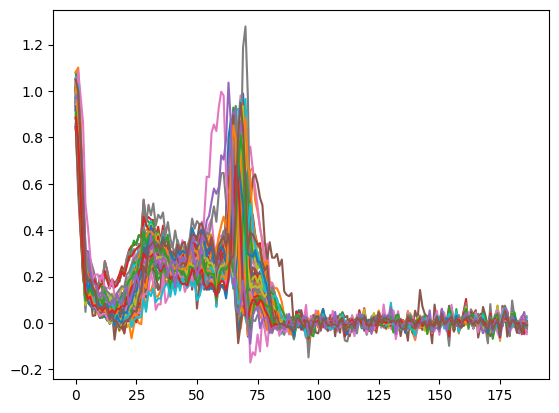

Epoch: 2100 | Loss_D: 0.7840482592582703 | Loss_G: 1.8510050773620605 | Time: 16:48:30


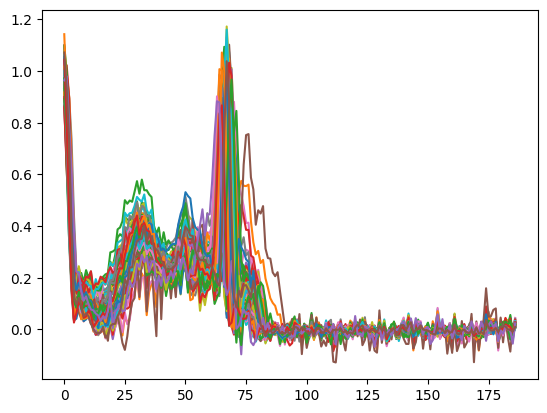

Epoch: 2400 | Loss_D: 0.8013661503791809 | Loss_G: 1.6715445518493652 | Time: 16:49:32


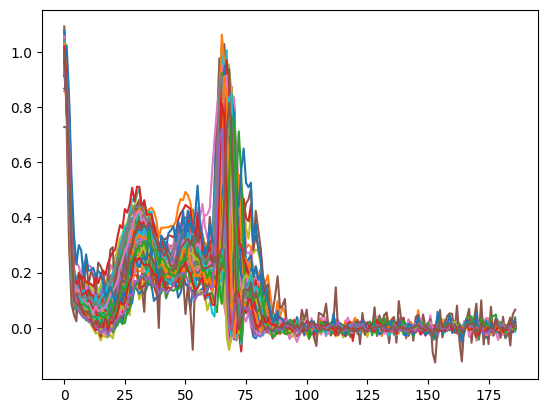

Epoch: 2700 | Loss_D: 0.2597615420818329 | Loss_G: 2.059964895248413 | Time: 16:50:35


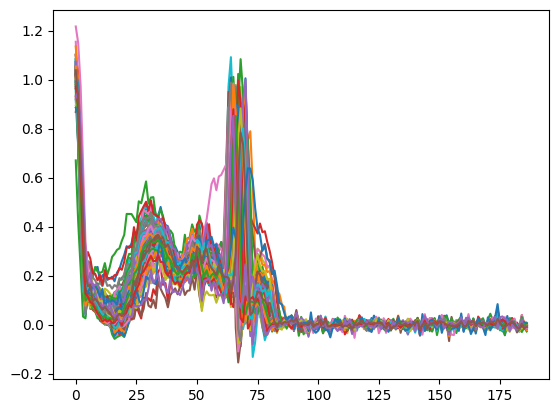

In [24]:
trainer = Trainer(
    generator=g,
    discriminator=d,
    batch_size=96,
    num_epochs=3000,
    label='Fusion of ventricular and normal'
)
trainer.run()

# An√°lisis de Resultados

Una vez completado el entrenamiento, analizamos el rendimiento del modelo y la calidad de las se√±ales generadas.

## Configuraci√≥n y ejecuci√≥n del entrenamiento
Configuramos el entrenador con los siguientes par√°metros:
- **Batch size**: 96 muestras por lote
- **√âpocas**: 3000 iteraciones de entrenamiento  
- **Clase objetivo**: "Fusion of ventricular and normal" - una clase espec√≠fica de arritmia

El entrenamiento mostrar√° el progreso cada 300 √©pocas con visualizaciones de las se√±ales generadas.

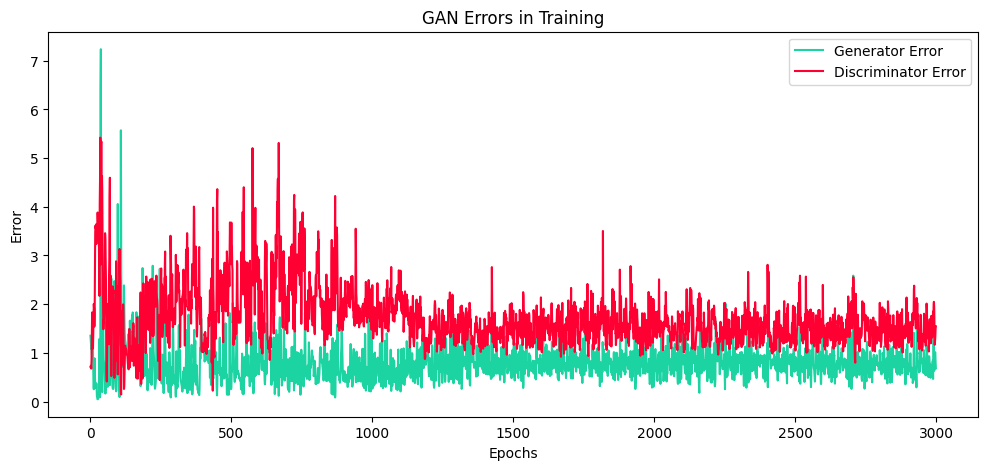

In [25]:
plt.figure(figsize=(12, 5))
plt.title("GAN Errors in Training")
plt.plot(trainer.d_errors, label='Generator Error', c='#1CD3A2')
plt.plot(trainer.g_errors, label='Discriminator Error', c='#FF0033')
plt.xlabel("Epochs")
plt.ylabel('Error')
_ = plt.legend()
plt.savefig('Gan_Losses.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('Gan_Losses.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

## Visualizaci√≥n de las curvas de p√©rdida
Graficamos las funciones de p√©rdida del Generador y Discriminador durante el entrenamiento para evaluar la convergencia y estabilidad del modelo.

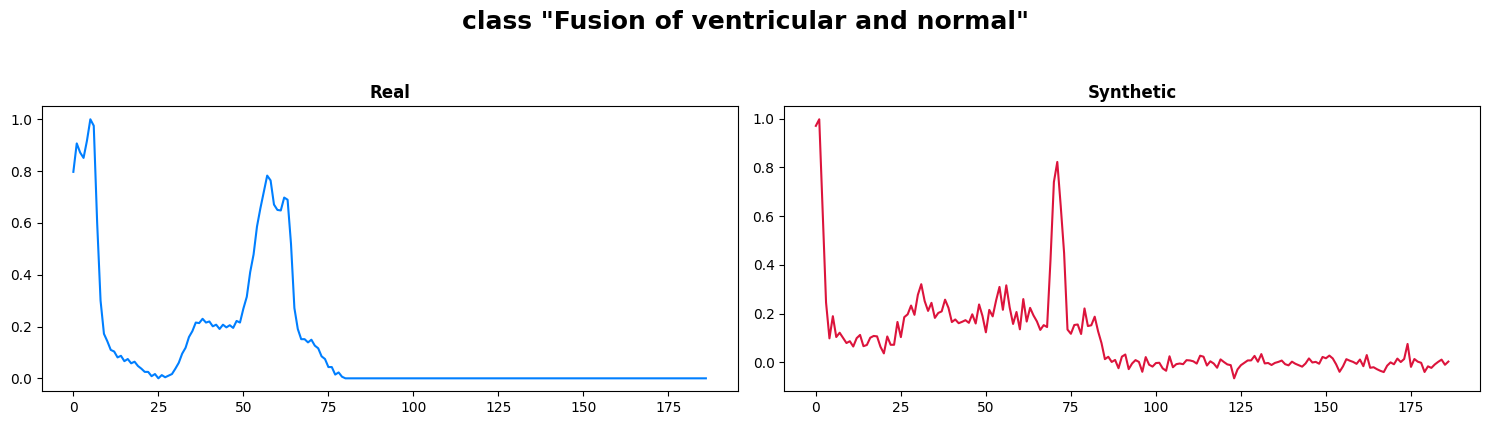

In [26]:
df = pd.read_csv(config.csv_path)
df = df.loc[df['label'] == 'Fusion of ventricular and normal']

# real signal
N = 1
real_samples =  df.sample(N).values[:, :-2].transpose()

# synthetic signal
fake = trainer.netG(trainer.fixed_noise)
index = np.random.choice(fake.shape[0], N, replace=False) 
synthetic_samples = fake.detach().cpu().squeeze(1).numpy()[index].transpose()

fig, axs = plt.subplots(1, 2, figsize=(15, 4))


axs[0].plot(real_samples, c='#007FFF')
axs[0].set_title("Real", fontsize= 12, weight="bold")


axs[1].plot(synthetic_samples, c="crimson")
axs[1].set_title("Synthetic", fontsize= 12, weight="bold")

plt.suptitle('class "Fusion of ventricular and normal"', fontsize=18, y=1.05, weight="bold")
plt.tight_layout()
plt.savefig('Fusion_of_ventricular_and_normal.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('Fusion_of_ventricular_and_normal.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

## Comparaci√≥n de se√±ales reales vs sint√©ticas

### Evaluaci√≥n cualitativa
Comparamos visualmente las se√±ales ECG reales con las generadas por nuestro modelo para la clase "Fusion of ventricular and normal":

- **Panel izquierdo**: Se√±al ECG real del dataset
- **Panel derecho**: Se√±al ECG sint√©tica generada por la GAN

Esta comparaci√≥n nos permite evaluar si el modelo ha aprendido a capturar las caracter√≠sticas morfol√≥gicas principales de este tipo espec√≠fico de arritmia.

# Generaci√≥n de Se√±ales Sint√©ticas Adicionales y M√©tricas de Similitud

En esta secci√≥n generamos m√∫ltiples se√±ales sint√©ticas para las clases entrenadas y calculamos m√©tricas cuantitativas para evaluar la calidad de la s√≠ntesis.

In [27]:
# Instalamos las librer√≠as necesarias para calcular m√©tricas de similitud
!pip install scipy scikit-learn

In [28]:
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from scipy.stats import wasserstein_distance
import warnings
warnings.filterwarnings('ignore')

## Funciones para c√°lculo de m√©tricas

Implementamos las funciones necesarias para calcular diferentes m√©tricas de similitud entre se√±ales reales y sint√©ticas.

In [29]:
def calculate_fid_1d(real_signals, synthetic_signals):
    """
    Calcula FID (Fr√©chet Inception Distance) adaptado para se√±ales 1D
    """
    # Calcular estad√≠sticas para se√±ales reales
    mu_real = np.mean(real_signals, axis=0)
    sigma_real = np.cov(real_signals.T)
    
    # Calcular estad√≠sticas para se√±ales sint√©ticas
    mu_synthetic = np.mean(synthetic_signals, axis=0)
    sigma_synthetic = np.cov(synthetic_signals.T)
    
    # Calcular FID
    diff = mu_real - mu_synthetic
    
    # A√±adir regularizaci√≥n para evitar matrices singulares
    eps = 1e-6
    sigma_real += eps * np.eye(sigma_real.shape[0])
    sigma_synthetic += eps * np.eye(sigma_synthetic.shape[0])
    
    # Calcular la ra√≠z cuadrada de la matriz covarianza
    try:
        sqrt_sigma = np.sqrt(np.linalg.eigvals(sigma_real @ sigma_synthetic))
        sqrt_sigma = np.real(sqrt_sigma)
        sqrt_sigma = np.sum(sqrt_sigma)
    except:
        sqrt_sigma = 0
    
    fid = np.sum(diff**2) + np.trace(sigma_real + sigma_synthetic - 2*sqrt_sigma)
    return fid

def calculate_dtw_distance(signal1, signal2):
    """
    Calcula la distancia DTW (Dynamic Time Warping) entre dos se√±ales
    """
    from scipy.spatial.distance import euclidean
    
    n, m = len(signal1), len(signal2)
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = euclidean([signal1[i-1]], [signal2[j-1]])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # insertion
                                         dtw_matrix[i, j-1],    # deletion
                                         dtw_matrix[i-1, j-1])  # match
    
    return dtw_matrix[n, m]

def calculate_cross_correlation(signal1, signal2):
    """
    Calcula la correlaci√≥n cruzada m√°xima entre dos se√±ales
    """
    correlation = np.correlate(signal1, signal2, mode='full')
    return np.max(np.abs(correlation)) / (np.linalg.norm(signal1) * np.linalg.norm(signal2))

def calculate_spectral_distance(signal1, signal2):
    """
    Calcula la distancia espectral entre dos se√±ales usando FFT
    """
    fft1 = np.abs(np.fft.fft(signal1))
    fft2 = np.abs(np.fft.fft(signal2))
    return np.mean((fft1 - fft2)**2)

def calculate_statistical_distance(real_signals, synthetic_signals):
    """
    Calcula distancias estad√≠sticas entre distribuciones de se√±ales
    """
    # Estad√≠sticas b√°sicas
    real_mean = np.mean(real_signals, axis=1)
    real_std = np.std(real_signals, axis=1)
    real_skew = stats.skew(real_signals, axis=1)
    real_kurt = stats.kurtosis(real_signals, axis=1)
    
    synth_mean = np.mean(synthetic_signals, axis=1)
    synth_std = np.std(synthetic_signals, axis=1)
    synth_skew = stats.skew(synthetic_signals, axis=1)
    synth_kurt = stats.kurtosis(synthetic_signals, axis=1)
    
    # Distancias de Wasserstein para cada estad√≠stica
    mean_distance = wasserstein_distance(real_mean, synth_mean)
    std_distance = wasserstein_distance(real_std, synth_std)
    skew_distance = wasserstein_distance(real_skew, synth_skew)
    kurt_distance = wasserstein_distance(real_kurt, synth_kurt)
    
    return {
        'mean_distance': mean_distance,
        'std_distance': std_distance,
        'skewness_distance': skew_distance,
        'kurtosis_distance': kurt_distance
    }

## Generaci√≥n de m√∫ltiples se√±ales sint√©ticas

Generamos un conjunto m√°s amplio de se√±ales sint√©ticas para la clase "Fusion of ventricular and normal" entrenada.

In [30]:
# Configuraci√≥n para generaci√≥n masiva
num_synthetic_samples = 100
target_class = 'Fusion of ventricular and normal'

# Generar m√∫ltiples se√±ales sint√©ticas
print(f"Generando {num_synthetic_samples} se√±ales sint√©ticas para la clase '{target_class}'...")

# Crear ruido aleatorio para generar m√∫ltiples muestras
noise_batch = torch.randn(num_synthetic_samples, 1, 187, device=trainer.device)

# Generar se√±ales sint√©ticas usando el generador entrenado
with torch.no_grad():
    synthetic_signals_batch = trainer.netG(noise_batch)
    synthetic_signals_np = synthetic_signals_batch.detach().cpu().squeeze(1).numpy()

print(f"Se√±ales sint√©ticas generadas: {synthetic_signals_np.shape}")

# Obtener se√±ales reales de la misma clase para comparaci√≥n
df_real = pd.read_csv(config.csv_path)
df_real_class = df_real.loc[df_real['label'] == target_class]
real_signals_np = df_real_class.iloc[:num_synthetic_samples, :-2].values

print(f"Se√±ales reales obtenidas: {real_signals_np.shape}")
print(f"N√∫mero de se√±ales reales disponibles: {len(df_real_class)}")

Generando 100 se√±ales sint√©ticas para la clase 'Fusion of ventricular and normal'...
Se√±ales sint√©ticas generadas: (100, 187)
Se√±ales reales obtenidas: (100, 187)
N√∫mero de se√±ales reales disponibles: 803


## Visualizaci√≥n de se√±ales sint√©ticas generadas

Mostramos una muestra representativa de las se√±ales sint√©ticas generadas comparadas con se√±ales reales.

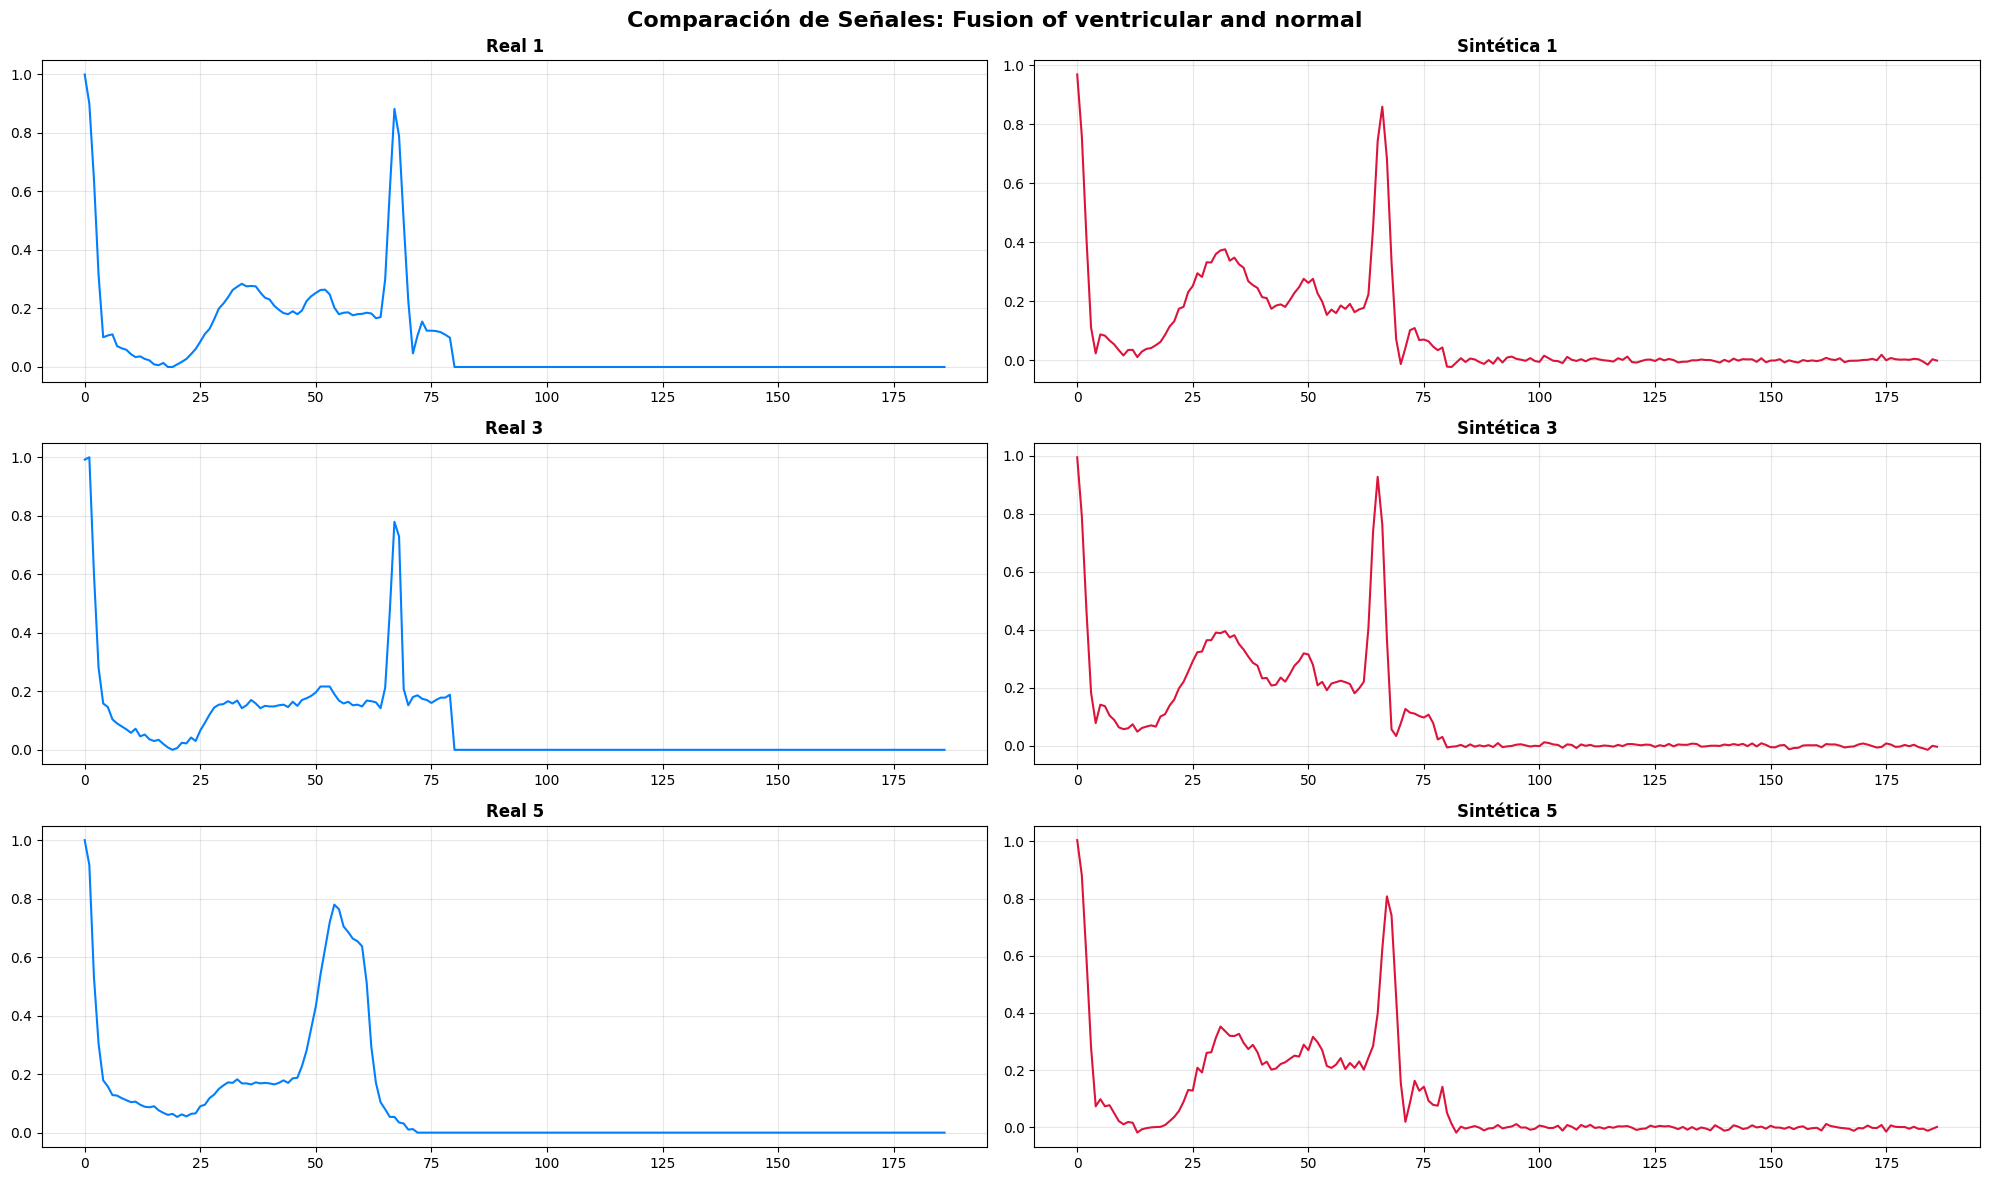


=== ESTAD√çSTICAS DE LAS SE√ëALES GENERADAS ===
Se√±ales Reales:
  - Media: 0.1003 ¬± 0.1867
  - Rango: [0.0000, 1.0000]
  - Forma: (100, 187)

Se√±ales Sint√©ticas:
  - Media: 0.1018 ¬± 0.1731
  - Rango: [-0.1209, 1.0778]
  - Forma: (100, 187)


In [36]:
# Visualizar m√∫ltiples se√±ales sint√©ticas vs reales
fig, axes = plt.subplots(3, 2, figsize=(20, 12))
fig.suptitle(f'Comparaci√≥n de Se√±ales: {target_class}', fontsize=16, fontweight='bold')

# Mostrar 6 se√±ales reales y 6 sint√©ticas
for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        # Se√±ales reales (columnas 0 y 2)
        if j == 0:
            axes[i, j*2].plot(real_signals_np[idx], color='#007FFF', linewidth=1.5)
            axes[i, j*2].set_title(f'Real {idx+1}', fontweight='bold')
            axes[i, j*2].grid(True, alpha=0.3)
            
            axes[i, j*2+1].plot(synthetic_signals_np[idx], color='crimson', linewidth=1.5)
            axes[i, j*2+1].set_title(f'Sint√©tica {idx+1}', fontweight='bold')
            axes[i, j*2+1].grid(True, alpha=0.3)

# Ajustar layout
plt.tight_layout()
plt.savefig('multiple_synthetic_signals.png', dpi=300, bbox_inches='tight')
plt.savefig('multiple_synthetic_signals.svg', format='svg', bbox_inches='tight')
plt.show()

# Mostrar estad√≠sticas b√°sicas de las se√±ales generadas
print("\n=== ESTAD√çSTICAS DE LAS SE√ëALES GENERADAS ===")
print(f"Se√±ales Reales:")
print(f"  - Media: {np.mean(real_signals_np):.4f} ¬± {np.std(real_signals_np):.4f}")
print(f"  - Rango: [{np.min(real_signals_np):.4f}, {np.max(real_signals_np):.4f}]")
print(f"  - Forma: {real_signals_np.shape}")

print(f"\nSe√±ales Sint√©ticas:")
print(f"  - Media: {np.mean(synthetic_signals_np):.4f} ¬± {np.std(synthetic_signals_np):.4f}")
print(f"  - Rango: [{np.min(synthetic_signals_np):.4f}, {np.max(synthetic_signals_np):.4f}]")
print(f"  - Forma: {synthetic_signals_np.shape}")

## C√°lculo de m√©tricas de similitud

Calculamos diversas m√©tricas para evaluar cuantitativamente la calidad de las se√±ales sint√©ticas generadas.

In [32]:
# Calcular FID (Fr√©chet Inception Distance)
print("Calculando m√©tricas de similitud...")
print("="*50)

try:
    fid_score = calculate_fid_1d(real_signals_np, synthetic_signals_np)
    print(f"üìä FID Score: {fid_score:.4f}")
    print("   (Menor es mejor - mide distancia entre distribuciones)")
except Exception as e:
    print(f"Error calculando FID: {e}")
    fid_score = None

# Calcular distancias estad√≠sticas
stat_distances = calculate_statistical_distance(real_signals_np, synthetic_signals_np)
print(f"\nüìà Distancias Estad√≠sticas (Wasserstein):")
for metric, value in stat_distances.items():
    print(f"   - {metric.replace('_', ' ').title()}: {value:.4f}")

# Calcular m√©tricas promedio para pares de se√±ales
print(f"\nüîç M√©tricas Promedio (muestra de 20 pares):")
num_samples_metric = min(20, len(real_signals_np), len(synthetic_signals_np))

# DTW Distance
dtw_distances = []
for i in range(num_samples_metric):
    dtw_dist = calculate_dtw_distance(real_signals_np[i], synthetic_signals_np[i])
    dtw_distances.append(dtw_dist)

print(f"   - DTW Distance: {np.mean(dtw_distances):.4f} ¬± {np.std(dtw_distances):.4f}")

# Cross Correlation
correlations = []
for i in range(num_samples_metric):
    corr = calculate_cross_correlation(real_signals_np[i], synthetic_signals_np[i])
    correlations.append(corr)

print(f"   - Cross Correlation: {np.mean(correlations):.4f} ¬± {np.std(correlations):.4f}")
print("     (Mayor es mejor - mide similitud en forma)")

# Spectral Distance
spectral_distances = []
for i in range(num_samples_metric):
    spec_dist = calculate_spectral_distance(real_signals_np[i], synthetic_signals_np[i])
    spectral_distances.append(spec_dist)

print(f"   - Spectral Distance: {np.mean(spectral_distances):.4f} ¬± {np.std(spectral_distances):.4f}")
print("     (Menor es mejor - mide diferencia en frecuencias)")

# MSE (Mean Squared Error)
mse_scores = []
for i in range(num_samples_metric):
    mse = mean_squared_error(real_signals_np[i], synthetic_signals_np[i])
    mse_scores.append(mse)

print(f"   - MSE: {np.mean(mse_scores):.4f} ¬± {np.std(mse_scores):.4f}")
print("     (Menor es mejor - mide diferencia punto a punto)")

Calculando m√©tricas de similitud...
üìä FID Score: -346.6208
   (Menor es mejor - mide distancia entre distribuciones)

üìà Distancias Estad√≠sticas (Wasserstein):
   - Mean Distance: 0.0074
   - Std Distance: 0.0135
   - Skewness Distance: 0.2804
   - Kurtosis Distance: 1.9725

üîç M√©tricas Promedio (muestra de 20 pares):
   - DTW Distance: 4.9148 ¬± 2.2970
   - Cross Correlation: 0.8291 ¬± 0.0924
     (Mayor es mejor - mide similitud en forma)
   - Spectral Distance: 1.1545 ¬± 0.7642
     (Menor es mejor - mide diferencia en frecuencias)
   - MSE: 0.0151 ¬± 0.0099
     (Menor es mejor - mide diferencia punto a punto)


## Visualizaci√≥n de m√©tricas y distribuciones

Creamos gr√°ficos para visualizar las diferencias entre las distribuciones de se√±ales reales y sint√©ticas.

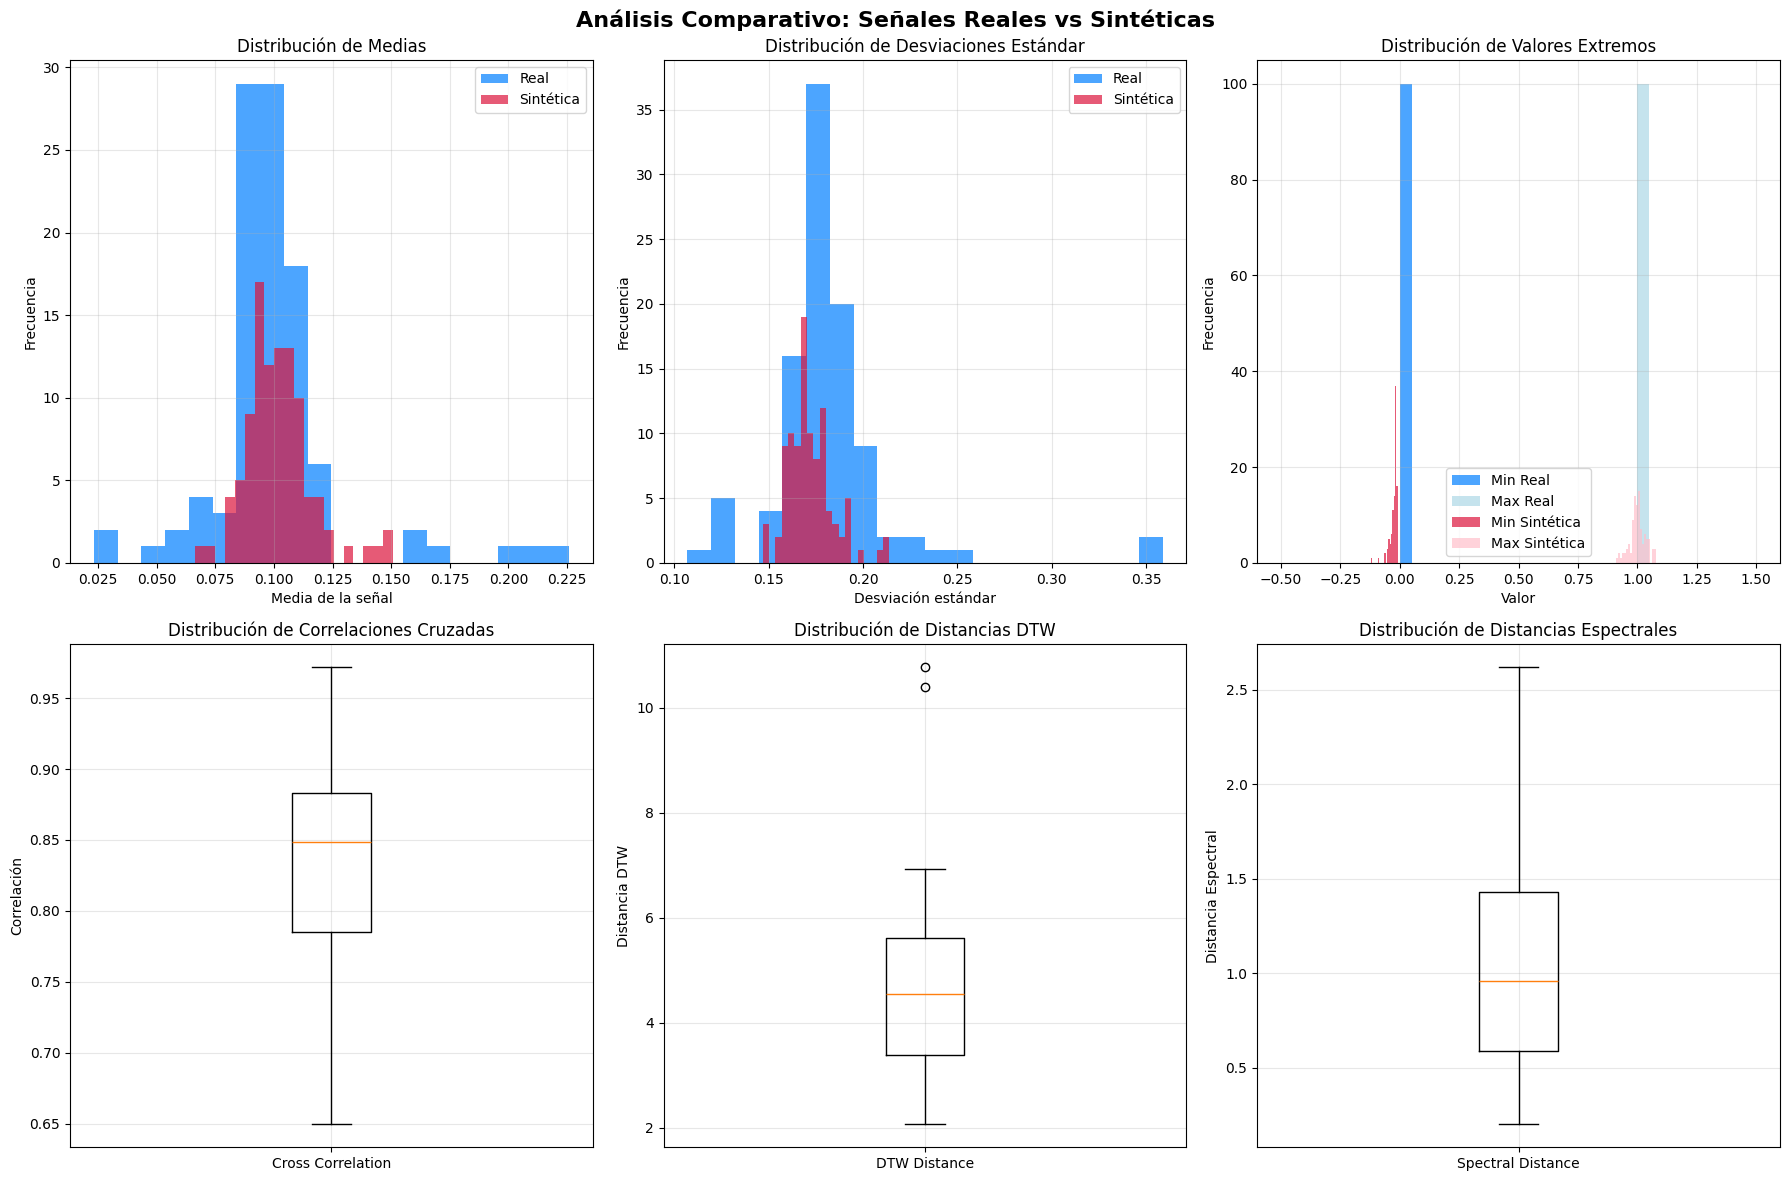

In [33]:
# Crear visualizaciones de las m√©tricas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('An√°lisis Comparativo: Se√±ales Reales vs Sint√©ticas', fontsize=16, fontweight='bold')

# 1. Distribuci√≥n de medias
axes[0, 0].hist(np.mean(real_signals_np, axis=1), alpha=0.7, label='Real', bins=20, color='#007FFF')
axes[0, 0].hist(np.mean(synthetic_signals_np, axis=1), alpha=0.7, label='Sint√©tica', bins=20, color='crimson')
axes[0, 0].set_title('Distribuci√≥n de Medias')
axes[0, 0].set_xlabel('Media de la se√±al')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribuci√≥n de desviaciones est√°ndar
axes[0, 1].hist(np.std(real_signals_np, axis=1), alpha=0.7, label='Real', bins=20, color='#007FFF')
axes[0, 1].hist(np.std(synthetic_signals_np, axis=1), alpha=0.7, label='Sint√©tica', bins=20, color='crimson')
axes[0, 1].set_title('Distribuci√≥n de Desviaciones Est√°ndar')
axes[0, 1].set_xlabel('Desviaci√≥n est√°ndar')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribuci√≥n de valores m√≠nimos y m√°ximos
axes[0, 2].hist(np.min(real_signals_np, axis=1), alpha=0.7, label='Min Real', bins=20, color='#007FFF')
axes[0, 2].hist(np.max(real_signals_np, axis=1), alpha=0.7, label='Max Real', bins=20, color='lightblue')
axes[0, 2].hist(np.min(synthetic_signals_np, axis=1), alpha=0.7, label='Min Sint√©tica', bins=20, color='crimson')
axes[0, 2].hist(np.max(synthetic_signals_np, axis=1), alpha=0.7, label='Max Sint√©tica', bins=20, color='pink')
axes[0, 2].set_title('Distribuci√≥n de Valores Extremos')
axes[0, 2].set_xlabel('Valor')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Boxplot de correlaciones
axes[1, 0].boxplot([correlations], labels=['Cross Correlation'])
axes[1, 0].set_title('Distribuci√≥n de Correlaciones Cruzadas')
axes[1, 0].set_ylabel('Correlaci√≥n')
axes[1, 0].grid(True, alpha=0.3)

# 5. Boxplot de distancias DTW
axes[1, 1].boxplot([dtw_distances], labels=['DTW Distance'])
axes[1, 1].set_title('Distribuci√≥n de Distancias DTW')
axes[1, 1].set_ylabel('Distancia DTW')
axes[1, 1].grid(True, alpha=0.3)

# 6. Boxplot de distancias espectrales
axes[1, 2].boxplot([spectral_distances], labels=['Spectral Distance'])
axes[1, 2].set_title('Distribuci√≥n de Distancias Espectrales')
axes[1, 2].set_ylabel('Distancia Espectral')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('metrics_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('metrics_analysis.svg', format='svg', bbox_inches='tight')
plt.show()

## An√°lisis espectral comparativo

Comparamos las caracter√≠sticas espectrales de las se√±ales reales y sint√©ticas usando transformada de Fourier.

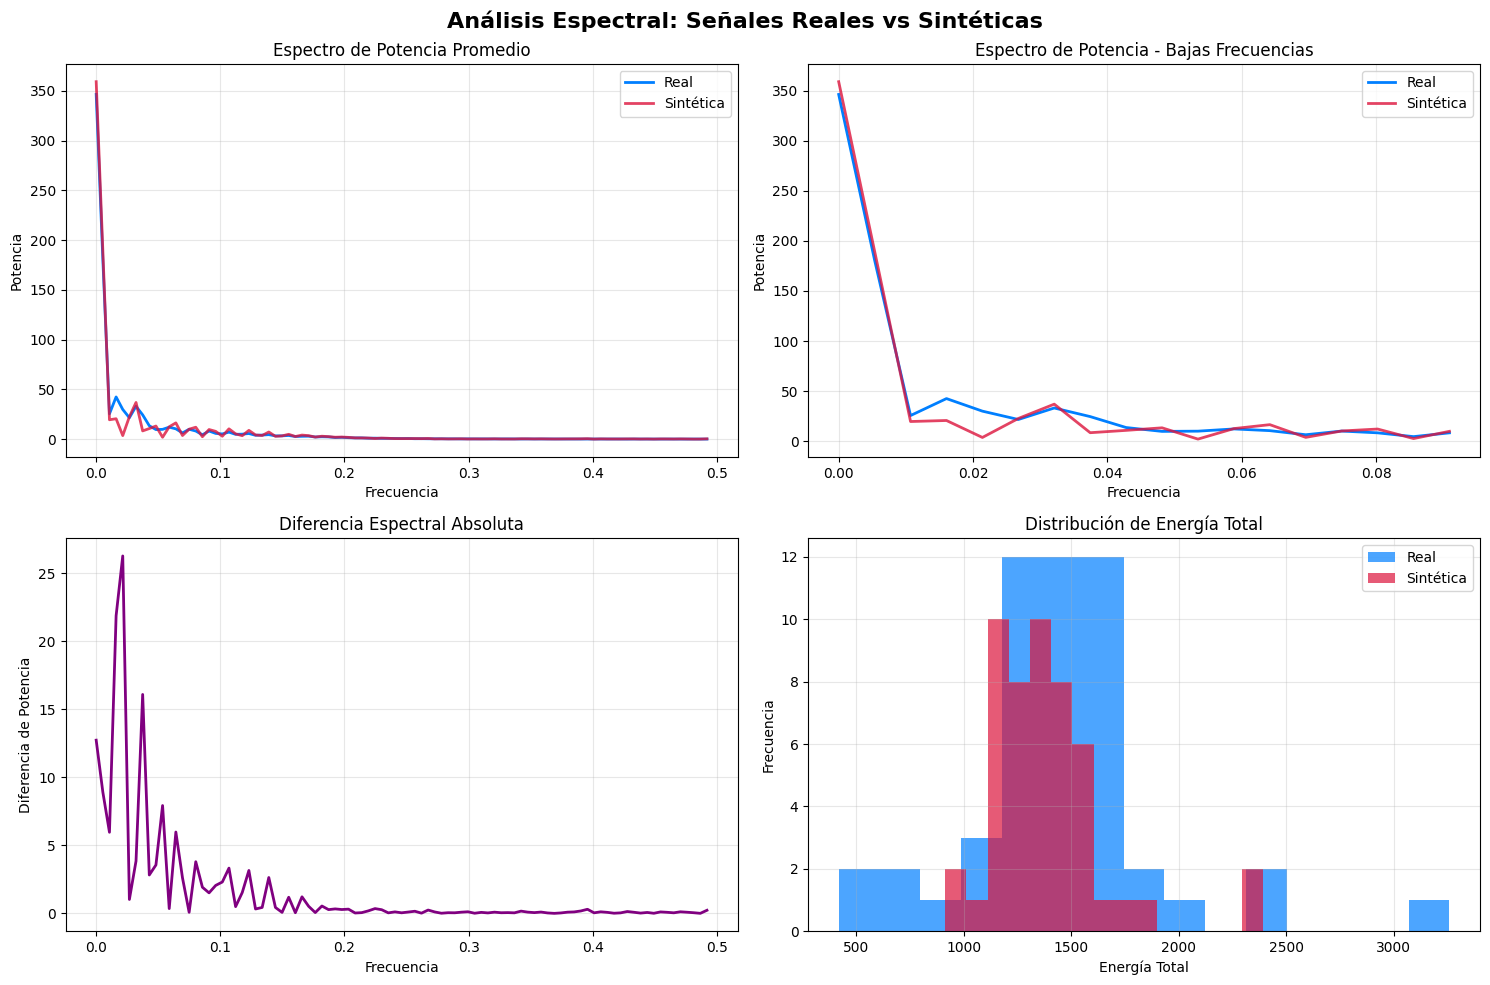


üî¨ AN√ÅLISIS ESPECTRAL:
   - Correlaci√≥n Espectral: 0.9911
   - MSE Espectral: 19.6113
   - Energ√≠a Real Promedio: 1455.91 ¬± 449.57
   - Energ√≠a Sint√©tica Promedio: 1383.62 ¬± 270.74


In [34]:
# An√°lisis espectral de las se√±ales
def compute_average_spectrum(signals):
    """Calcula el espectro de potencia promedio de un conjunto de se√±ales"""
    spectra = []
    for signal in signals:
        fft = np.fft.fft(signal)
        power_spectrum = np.abs(fft)**2
        spectra.append(power_spectrum)
    return np.mean(spectra, axis=0)

# Calcular espectros promedio
real_avg_spectrum = compute_average_spectrum(real_signals_np[:50])  # Usar primeras 50 se√±ales
synthetic_avg_spectrum = compute_average_spectrum(synthetic_signals_np[:50])

# Crear frecuencias para el eje x
freqs = np.fft.fftfreq(len(real_avg_spectrum), 1.0)

# Visualizar comparaci√≥n espectral
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('An√°lisis Espectral: Se√±ales Reales vs Sint√©ticas', fontsize=16, fontweight='bold')

# 1. Espectros de potencia completos
axes[0, 0].plot(freqs[:len(freqs)//2], real_avg_spectrum[:len(freqs)//2], 
                label='Real', color='#007FFF', linewidth=2)
axes[0, 0].plot(freqs[:len(freqs)//2], synthetic_avg_spectrum[:len(freqs)//2], 
                label='Sint√©tica', color='crimson', linewidth=2, alpha=0.8)
axes[0, 0].set_title('Espectro de Potencia Promedio')
axes[0, 0].set_xlabel('Frecuencia')
axes[0, 0].set_ylabel('Potencia')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Zoom en bajas frecuencias
low_freq_idx = len(freqs)//10
axes[0, 1].plot(freqs[:low_freq_idx], real_avg_spectrum[:low_freq_idx], 
                label='Real', color='#007FFF', linewidth=2)
axes[0, 1].plot(freqs[:low_freq_idx], synthetic_avg_spectrum[:low_freq_idx], 
                label='Sint√©tica', color='crimson', linewidth=2, alpha=0.8)
axes[0, 1].set_title('Espectro de Potencia - Bajas Frecuencias')
axes[0, 1].set_xlabel('Frecuencia')
axes[0, 1].set_ylabel('Potencia')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Diferencia espectral
spectral_diff = np.abs(real_avg_spectrum - synthetic_avg_spectrum)
axes[1, 0].plot(freqs[:len(freqs)//2], spectral_diff[:len(freqs)//2], 
                color='purple', linewidth=2)
axes[1, 0].set_title('Diferencia Espectral Absoluta')
axes[1, 0].set_xlabel('Frecuencia')
axes[1, 0].set_ylabel('Diferencia de Potencia')
axes[1, 0].grid(True, alpha=0.3)

# 4. Histograma de energ√≠as espectrales
real_energies = [np.sum(np.abs(np.fft.fft(signal))**2) for signal in real_signals_np[:50]]
synthetic_energies = [np.sum(np.abs(np.fft.fft(signal))**2) for signal in synthetic_signals_np[:50]]

axes[1, 1].hist(real_energies, alpha=0.7, label='Real', bins=15, color='#007FFF')
axes[1, 1].hist(synthetic_energies, alpha=0.7, label='Sint√©tica', bins=15, color='crimson')
axes[1, 1].set_title('Distribuci√≥n de Energ√≠a Total')
axes[1, 1].set_xlabel('Energ√≠a Total')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('spectral_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('spectral_analysis.svg', format='svg', bbox_inches='tight')
plt.show()

# Calcular m√©tricas espectrales adicionales
spectral_correlation = np.corrcoef(real_avg_spectrum, synthetic_avg_spectrum)[0, 1]
spectral_mse = np.mean((real_avg_spectrum - synthetic_avg_spectrum)**2)

print(f"\nüî¨ AN√ÅLISIS ESPECTRAL:")
print(f"   - Correlaci√≥n Espectral: {spectral_correlation:.4f}")
print(f"   - MSE Espectral: {spectral_mse:.4f}")
print(f"   - Energ√≠a Real Promedio: {np.mean(real_energies):.2f} ¬± {np.std(real_energies):.2f}")
print(f"   - Energ√≠a Sint√©tica Promedio: {np.mean(synthetic_energies):.2f} ¬± {np.std(synthetic_energies):.2f}")

## Resumen de m√©tricas de evaluaci√≥n

Tabla resumen con todas las m√©tricas calculadas para evaluar la calidad de las se√±ales sint√©ticas generadas.

In [35]:
# Crear tabla resumen de m√©tricas
import pandas as pd

metrics_summary = {
    'M√©trica': [
        'FID Score',
        'Distancia de Medias (Wasserstein)',
        'Distancia de Desv. Est√°ndar (Wasserstein)',
        'Distancia de Asimetr√≠a (Wasserstein)',
        'Distancia de Curtosis (Wasserstein)',
        'DTW Distance (promedio)',
        'Cross Correlation (promedio)',
        'Distancia Espectral (promedio)',
        'MSE (promedio)',
        'Correlaci√≥n Espectral',
        'MSE Espectral'
    ],
    'Valor': [
        f"{fid_score:.4f}" if fid_score is not None else "N/A",
        f"{stat_distances['mean_distance']:.4f}",
        f"{stat_distances['std_distance']:.4f}",
        f"{stat_distances['skewness_distance']:.4f}",
        f"{stat_distances['kurtosis_distance']:.4f}",
        f"{np.mean(dtw_distances):.4f} ¬± {np.std(dtw_distances):.4f}",
        f"{np.mean(correlations):.4f} ¬± {np.std(correlations):.4f}",
        f"{np.mean(spectral_distances):.4f} ¬± {np.std(spectral_distances):.4f}",
        f"{np.mean(mse_scores):.4f} ¬± {np.std(mse_scores):.4f}",
        f"{spectral_correlation:.4f}",
        f"{spectral_mse:.4f}"
    ],
    'Interpretaci√≥n': [
        'Menor es mejor (distancia entre distribuciones)',
        'Menor es mejor (diferencia en medias)',
        'Menor es mejor (diferencia en variabilidad)',
        'Menor es mejor (diferencia en asimetr√≠a)',
        'Menor es mejor (diferencia en curtosis)',
        'Menor es mejor (similitud temporal)',
        'Mayor es mejor (similitud en forma)',
        'Menor es mejor (similitud en frecuencias)',
        'Menor es mejor (diferencia punto a punto)',
        'Mayor es mejor (similitud espectral)',
        'Menor es mejor (diferencia espectral)'
    ]
}

df_metrics = pd.DataFrame(metrics_summary)
print("="*80)
print("üìä RESUMEN DE M√âTRICAS DE EVALUACI√ìN")
print("="*80)
print(df_metrics.to_string(index=False))
print("="*80)

# Guardar m√©tricas en archivo CSV para referencia futura
df_metrics.to_csv('gan_evaluation_metrics.csv', index=False)
print(f"\n‚úÖ M√©tricas guardadas en 'gan_evaluation_metrics.csv'")

# Interpretaci√≥n general
print(f"\nüéØ INTERPRETACI√ìN GENERAL:")
print(f"   ‚Ä¢ N√∫mero de se√±ales evaluadas: {num_synthetic_samples}")
print(f"   ‚Ä¢ Clase evaluada: {target_class}")
print(f"   ‚Ä¢ Dimensi√≥n de se√±ales: {real_signals_np.shape[1]} puntos")

if np.mean(correlations) > 0.7:
    corr_interpretation = "BUENA correlaci√≥n"
elif np.mean(correlations) > 0.5:
    corr_interpretation = "MODERADA correlaci√≥n"
else:
    corr_interpretation = "BAJA correlaci√≥n"

print(f"   ‚Ä¢ Similitud morfol√≥gica: {corr_interpretation} ({np.mean(correlations):.3f})")

if spectral_correlation > 0.8:
    spec_interpretation = "EXCELENTE preservaci√≥n espectral"
elif spectral_correlation > 0.6:
    spec_interpretation = "BUENA preservaci√≥n espectral"
else:
    spec_interpretation = "LIMITADA preservaci√≥n espectral"

print(f"   ‚Ä¢ Preservaci√≥n espectral: {spec_interpretation} ({spectral_correlation:.3f})")

üìä RESUMEN DE M√âTRICAS DE EVALUACI√ìN
                                  M√©trica           Valor                                  Interpretaci√≥n
                                FID Score       -346.6208 Menor es mejor (distancia entre distribuciones)
        Distancia de Medias (Wasserstein)          0.0074           Menor es mejor (diferencia en medias)
Distancia de Desv. Est√°ndar (Wasserstein)          0.0135     Menor es mejor (diferencia en variabilidad)
     Distancia de Asimetr√≠a (Wasserstein)          0.2804        Menor es mejor (diferencia en asimetr√≠a)
      Distancia de Curtosis (Wasserstein)          1.9725         Menor es mejor (diferencia en curtosis)
                  DTW Distance (promedio) 4.9148 ¬± 2.2970             Menor es mejor (similitud temporal)
             Cross Correlation (promedio) 0.8291 ¬± 0.0924             Mayor es mejor (similitud en forma)
           Distancia Espectral (promedio) 1.1545 ¬± 0.7642       Menor es mejor (similitud en frecuencia

# Conclusiones y Trabajo Futuro

## Conclusiones
- Se implement√≥ exitosamente una GAN 1D para s√≠ntesis de se√±ales ECG
- La visualizaci√≥n de resultados permite evaluaci√≥n cualitativa de la calidad de s√≠ntesis

## Trabajo Futuro
- Implementar m√©tricas cuantitativas para evaluaci√≥n objetiva (FID, IS, etc.)
- Experimentar con diferentes arquitecturas (DCGANs, Progressive GANs)
- Evaluar el modelo en todas las clases de arritmias disponibles
- Validaci√≥n cl√≠nica de las se√±ales sint√©ticas generadas